# LSTM-4

In [14]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import random
import pandas as pd
import keras
from keras import layers
import utils as ut
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.models import load_model

In [15]:
df = ut.data2()

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)
fv:1, max:34245
fv:2, max:57422
fv:3, max:279251095
fv:4, max:144920186679
fv:5, max:13955
fv:6, max:920
fv:7, max:6228
fv:8, max:534856
fv:9, max:1380.0
SUCCESS


In [16]:
dg = df.copy()

fc = [str(e) for e in range(1,10)]
dx = dg[fc]
x = dx.to_numpy()

dy = dg[['e']]
y = dy.to_numpy()

dy = pd.get_dummies(dg['e'],prefix='e')
y = dy.to_numpy()

In [4]:
x.shape, y.shape

((282, 9), (282, 2))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

In [6]:
X_train.shape, y_train.shape

((188, 9), (188, 2))

In [7]:
X_test.shape, y_test.shape

((94, 9), (94, 2))

In [26]:
class M1:
    
    def __init__(self, n_input, n_units, n_output): 
        
        self.n_input = n_input
        self.n_units = n_units
        self.n_output = n_output
        self.comment = None

    def setcomment(self, msg):
        
        self.comment = msg
        
    def setmodel(self):

        model = Sequential()
        inputs = Input(shape=(1,n_input))
        model.add(inputs)

        lstm = LSTM(self.n_units, return_sequences=True, name="l1")
        model.add(lstm)

        lstm = LSTM(5, return_sequences=True, name="l2")
        model.add(lstm)

        dense = Dense(10, name="l3")
        model.add(dense)

        dense = Dense(self.n_output, activation='softmax', name="l4")
        model.add(dense)

        return model

In [120]:
n_input = 9
n_output = 2
n_units = 9

m = M1(n_input, n_units, n_output)
mm = m.setmodel()
#mm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

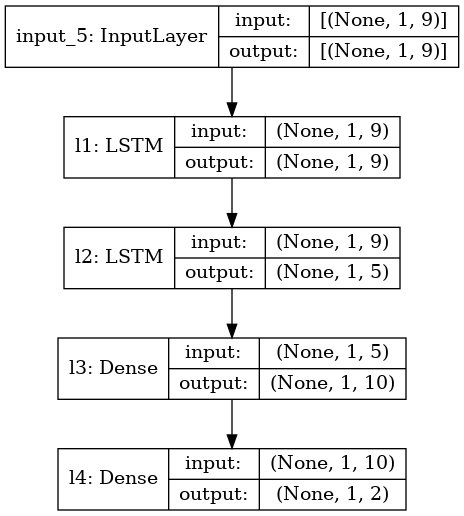

In [121]:
ut.fpm(mm)

In [122]:
dx, dy = ut.gensetsall1()

no of rows:  (124494, 12)
Index(['d', 'm', 'e', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
after date aggregation per day:  (304, 11)
after event aggregation :  (282, 11)
fv:1, max:34245
fv:2, max:57422
fv:3, max:279251095
fv:4, max:144920186679
fv:5, max:13955
fv:6, max:920
fv:7, max:6228
fv:8, max:534856
fv:9, max:1380.0
SUCCESS


In [123]:
xr, xs, yr, ys = ut.tts(dx,dy)

meaning of symbols
x:fv, y:target, r:train, s:test


In [124]:
len(xr), len(xs), len(yr), len(ys)

(19, 9, 19, 9)

In [125]:
len(xr[0])

10

In [126]:
xr0 = tf.reshape(xr[0].to_numpy(), [10,1,9])
yr0 = tf.reshape(yr[0].to_numpy(), [10,1,2])

In [127]:
xr0.shape, yr0.shape

(TensorShape([10, 1, 9]), TensorShape([10, 1, 2]))

In [128]:
%%time
hist = mm.fit(xr0, yr0, epochs=100, batch_size=5, verbose=1,)
model = tf.keras.models.save_model(mm,'m1.h5')

Epoch 1/100
2/2 [==============================] - 5s 8ms/step - loss: 0.6882 - accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6830 - accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6724 - accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6670 - accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6616 - accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6449 - accuracy: 1.0000
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6392 - accuracy: 1.0000
Epoch 11/100
2/2 [===========

In [135]:
%%time

sq = []
hp = []
ns = len(xr)
ns

CPU times: user 190 µs, sys: 34 µs, total: 224 µs
Wall time: 241 µs


19

In [130]:
datasetT = np.random.choice(range(1,ns),size=8)
print(dataset)

[12  9  7  2  8  4 18 10]


In [131]:
datasetR = set(range(1,ns)) - set(datasetT) 
datasetR = list(datasetR)
datasetR

[1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17]

In [136]:
%%time 
for e in datasetT :
    
    x = xr[e]
    y = yr[e]
    
    print(x.shape, y.shape)
    
    xt = tf.reshape(x.to_numpy(), [10,1,9])
    yt = tf.reshape(y.to_numpy(), [10,1,2])
    mk = load_model('m1.h5')
    hist = mm.fit(xt, yt, epochs=100, batch_size=5, verbose=0)
    hp.append(hist)

(10, 9) (10, 2)
(10, 9) (10, 2)
(10, 9) (10, 2)
(10, 9) (10, 2)
(10, 9) (10, 2)
(10, 9) (10, 2)
(10, 9) (10, 2)
(10, 9) (10, 2)
CPU times: user 26.1 s, sys: 4.47 s, total: 30.6 s
Wall time: 17.2 s


8 8 [16 12 18  4  2 15 16  4]


Text(0.5, 1.0, 'loss per iteration')

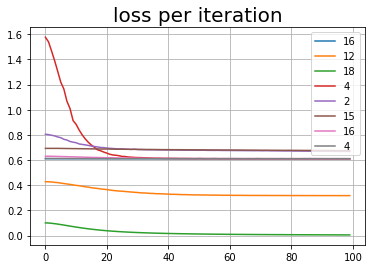

In [142]:
lg = []
print(len(datasetT), len(hp), datasetT)

c = 0
for e in datasetT:

    plt.plot(hp[c].history['loss'])
    lg.append(e)
    c += 1

plt.grid()
plt.legend(lg)
plt.title('loss per iteration', fontsize=20)

In [117]:
def pred(n):
    
    xt = xs[n]
    yt = ys[n]
    
    x = tf.reshape(xt.to_numpy(), [10,1,9])
    y = tf.reshape(yt.to_numpy(), [10,1,2])
    
    return x, y
    

In [143]:
xt = xs[0]
yt = ys[0]

x = tf.reshape(xt.to_numpy(), [10,1,9])
y = tf.reshape(yt.to_numpy(), [10,1,2])

In [144]:
x.shape, y.shape

(TensorShape([10, 1, 9]), TensorShape([10, 1, 2]))

In [145]:
n = 3;
x, y = pred(n)
mk = load_model('m1.h5')
yp = mk.predict(x)

In [146]:
yp, yt

(array([[[0.9975132 , 0.00248686]],
 
        [[0.99760866, 0.0023913 ]],
 
        [[0.9976234 , 0.00237663]],
 
        [[0.99761355, 0.00238647]],
 
        [[0.9975477 , 0.00245235]],
 
        [[0.9974788 , 0.00252122]],
 
        [[0.99755234, 0.00244771]],
 
        [[0.99760014, 0.00239987]],
 
        [[0.99657154, 0.00342848]],
 
        [[0.99668044, 0.00331955]]], dtype=float32),
      e_0  e_1
 99     1    0
 100    1    0
 101    1    0
 102    1    0
 103    1    0
 104    1    0
 105    1    0
 106    0    1
 107    1    0
 108    1    0)